In [130]:
from torchvision import datasets, transforms
import helper1
import torch

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

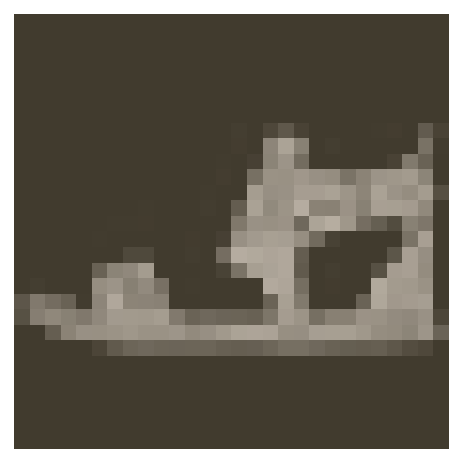

In [131]:
image, label = next(iter(trainloader))
helper1.imshow(image[0,:]);



In [137]:
# TODO: Define your network architecture here
## Your solution here
from torch import nn
from torch import optim
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2)
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.log_softmax(self.fc4(x), dim=1))
        
        return x

    



In [138]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [148]:
# TODO: Train the network here
train_losses = list()
test_losses = list()
epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        optimizer.zero_grad()
        output = model(images)
        
        # TODO: Training pass
        
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            # validation pass here
            for images, labels in testloader:
   
                # TODO: Calculate the class probabilities (softmax) for img
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = log_ps.topk(1, dim=1)

                # not sure why * ???
                equals = top_class == labels.view(*top_class.shape)

                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss / len(trainloader))
        test_losses.append(test_loss / len(testloader))
        model.train()
        print("Epoch: {}/{}... ".format(e + 1, epochs), 
             "Training Loss: {:.3f}".format(running_loss / len(trainloader)), 
             "Test Loss: {:.3f}".format(test_loss/ len(testloader)), 
             "Test Accuracy: {:.3f}".format(accuracy/ len(testloader)))

Epoch: 1/20...  Training Loss: 0.384 Test Loss: 0.387 Test Accuracy: 0.865
Epoch: 2/20...  Training Loss: 0.380 Test Loss: 0.405 Test Accuracy: 0.865
Epoch: 3/20...  Training Loss: 0.383 Test Loss: 0.383 Test Accuracy: 0.869
Epoch: 4/20...  Training Loss: 0.379 Test Loss: 0.398 Test Accuracy: 0.862
Epoch: 5/20...  Training Loss: 0.369 Test Loss: 0.372 Test Accuracy: 0.872
Epoch: 6/20...  Training Loss: 0.376 Test Loss: 0.415 Test Accuracy: 0.854
Epoch: 7/20...  Training Loss: 0.364 Test Loss: 0.391 Test Accuracy: 0.867
Epoch: 8/20...  Training Loss: 0.363 Test Loss: 0.375 Test Accuracy: 0.870
Epoch: 9/20...  Training Loss: 0.376 Test Loss: 0.384 Test Accuracy: 0.868
Epoch: 10/20...  Training Loss: 0.369 Test Loss: 0.385 Test Accuracy: 0.870
Epoch: 11/20...  Training Loss: 0.355 Test Loss: 0.384 Test Accuracy: 0.870
Epoch: 12/20...  Training Loss: 0.372 Test Loss: 0.384 Test Accuracy: 0.871
Epoch: 13/20...  Training Loss: 0.358 Test Loss: 0.394 Test Accuracy: 0.862
Epoch: 14/20...  Trai

torch.Size([64, 1, 28, 28])
torch.Size([64, 10])


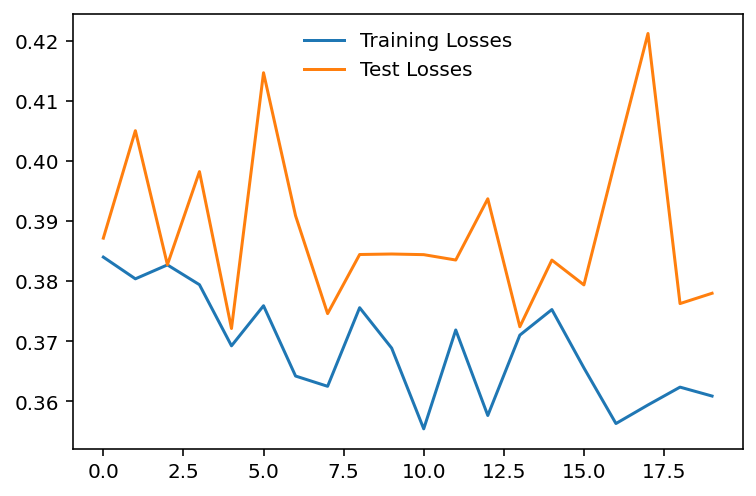

In [149]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



import helper1
import matplotlib.pyplot as plt
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()


# TODO: Calculate the class probabilities (softmax) for img
print(images.shape)
ps = torch.exp(model(images))
print(ps.shape)


# Plot the image and probabilities
plt.plot(train_losses, label="Training Losses")
plt.plot(test_losses, label="Test Losses")
plt.legend(frameon=False)

#helper1.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [150]:
top_p, top_class = ps.topk(1, dim=1)
print(top_class.shape)

print(labels.shape)
# not sure why * ???
equals = top_class == labels.view(*top_class.shape)

accuracy = torch.mean(equals.type(torch.FloatTensor))
print("accuracy: ", accuracy.item() * 100)

torch.Size([64, 1])
torch.Size([64])
accuracy:  29.6875
